In [1]:
import numpy as np
import random as rm
import pandas as pd
from random import seed
from random import random
import matplotlib.pyplot as plt
from pylab import *
from scipy.optimize import curve_fit
from scipy.stats import bernoulli, binom, norm
from scipy import integrate
import time

### generalized toy example Self-Interacting

In [3]:
# generalized toy example
def simulate(mu_list, sigma_list, n, alpha_list, p, y0, sigma, x0, epsilon):
    start = time.time()
    def f_pi(x):
        val = 0
        for i in range(len(mu_list)):
            val += alpha_list[i]*norm.pdf(x,mu_list[i], sigma_list[i]**0.5)
        return val

    def pdf_eta(x):
        return f_pi(x)**p

    c = integrate.quad(pdf_eta, -np.inf, np.inf)[0]
    
    def f_eta(x):
        return pdf_eta(x)/c
    
    def g(x):
        return(f_pi(x)/f_eta(x))
    
    def p_kernel(y0, sigma, n):
        count = 0
        Yn = y0
        estimator = [y0]
        while count<n:
            y = np.random.normal(Yn, sigma)
            u = np.random.uniform(0,1)
            alpha = min((pdf_eta(y)/pdf_eta(Yn)),1)
            if u <= alpha:
                estimator.append(y)
                Yn = y
                count += 1
        return estimator
    
    def k_kernel(x0, sigma):
        count = 0
        Xn = x0
        estimator = [x0]
        while count<1:
            y = np.random.normal(Xn,sigma)
            u = np.random.uniform(0,1)
            alpha = min((pdf_eta(y)/pdf_eta(Xn)),1)
            if u <= alpha:
                estimator.append(y)
                Xn = y
                count += 1
        return estimator[-1]
    
    def sum_g(sum_old, yn):
        return sum_old + g(yn)

    def prob_list(y_value, sum_old, prob_list_old):
        """
        prob_list = [g(i)/sum_new for i in y]
        return prob_list
        """
        a = sum_old/sum_g(sum_old, y_value)
        prob_list = prob_list_old*a
        prob_list = np.append(prob_list, g(y_value)/sum_g(sum_old, y_value))
        return prob_list
    
    def x_sample(x0, epsilon, y0, n, sigma):
        X_list = [0]*n
        X_list[0] = x0
        Y_list = [0]*n
        Y_list[0] = y0
        sum_gs = g(y0)
        Y_list = p_kernel(y0,sigma,n)
        prob_list_Ys = np.array([1])
        
        for k in range(1, n):
            prob_list_Ys = prob_list(Y_list[k], sum_gs, prob_list_Ys)
            sum_gs = sum_g(sum_gs, Y_list[k])
            i = bernoulli(epsilon).rvs(1)
            if i == 0:
                X_list[k] = (k_kernel(x0, sigma))
            else:
                X_list[k] = (np.random.choice(Y_list[:k+1], p = prob_list_Ys))
            x0 = X_list[k]
            
        return X_list
    
    X_list = x_sample(x0, epsilon, y0, n, sigma)
    mean = sum(X_list)/len(X_list)
    
    
    print("total:"+str(time.time() - start))
    
    return [X_list, mean]

In [4]:
mu_list = [0,17.5,10]
sigma_list = [.5,1,0.7]
alpha_list = [0.4,0.2,0.4]
p = 0.75
n = 1000
y0 = 15
x0 = 10
sigma = 10
epsilon = 0.05

X_list1 = simulate(mu_list, sigma_list, n, alpha_list, p, y0, sigma, x0, epsilon)[0]
'''
X_list2 = simulate(mu_list, sigma_list, n, alpha_list, p, y0, sigma, x0, epsilon)[0]
X_list3 = simulate(mu_list, sigma_list, n, alpha_list, p, y0, sigma, x0, epsilon)[0]
X_list4 = simulate(mu_list, sigma_list, n, alpha_list, p, y0, sigma, x0, epsilon)[0]
X_list5 = simulate(mu_list, sigma_list, n, alpha_list, p, y0, sigma, x0, epsilon)[0]
X_list6 = simulate(mu_list, sigma_list, n, alpha_list, p, y0, sigma, x0, epsilon)[0]
X_list7 = simulate(mu_list, sigma_list, n, alpha_list, p, y0, sigma, x0, epsilon)[0]
X_list8 = simulate(mu_list, sigma_list, n, alpha_list, p, y0, sigma, x0, epsilon)[0]
X_list9 = simulate(mu_list, sigma_list, n, alpha_list, p, y0, sigma, x0, epsilon)[0]
X_list10 = simulate(mu_list, sigma_list, n, alpha_list, p, y0, sigma, x0, epsilon)[0]
'''
mean = simulate(mu_list, sigma_list, n, alpha_list, p, y0, sigma, x0, epsilon)[1]

total:3.504734992980957
total:3.435570001602173


In [5]:
print(mean)

9.250350852150477


In [7]:
print(X_list1)

[10, 16.18082456645812, 15.583814706315126, 16.470838422573696, 17.34986428687907, 10.161825240972615, 8.939938843395774, 8.852351412773933, 17.34986546768898, 0.19484724793404595, 1.2316737943316545, 7.840667612218845, 12.038212577118955, 2.3035350309732276, 7.312398716905972, 11.609094339658103, 9.094645197159448, 9.058596464540466, 10.367243644644143, 9.494646380035869, 9.395459520442435, -0.19423931413475515, 8.24837106285465, 9.359739204548692, 16.77302349965442, 10.93892692918365, 17.528097713473702, 11.289222653209976, 11.325237240081906, -0.6918188855399361, -0.10551212915871966, -1.0557699989814724, 10.54767514240562, 1.3495154408289984, 16.87471282582958, 16.414854446795914, 1.656769010588473, -1.0478230465395848, 16.682835652175076, 9.435733759969462, 9.963528561472376, -0.07127407730965984, 0.38544131431005524, 0.3733148765732242, 0.5104556415974326, 17.675383537677455, 10.265455471394976, 11.076655400926182, 0.033455165987781754, 10.674398018774403, 17.903023709978946, 17.

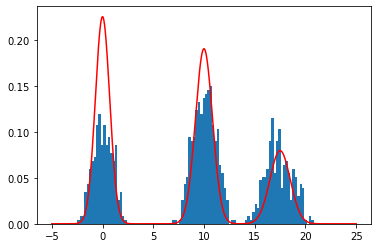

In [9]:
# plot
pdf_pi = lambda x: 0.4*(1/np.sqrt(2*math.pi*0.5))*np.exp((-1/2)*((x-0)**2/0.5)) + 0.2*(1/np.sqrt(2*math.pi*1))*np.exp((-1/2)*((x-17.5)**2/1))+0.4*(1/np.sqrt(2*math.pi*0.7))*np.exp((-1/2)*((x-10)**2/0.7))

plt.hist(X_list1, density = True, bins = 100)
t = np.linspace(-5,25,1000)
vals = pdf_pi(t)
plt.plot(t,vals, 'r')


### many particles, $x_i$ with $y_i$ Parallel

In [6]:
# x_i move according to y_i
def simulate_list1(mu_list, sigma_list, n, alpha_list, p, y0_list, sigma, x0_list, epsilon, N):
    start = time.time()
    
    def f_pi(x):
        val = 0
        for i in range(len(mu_list)):
            val += alpha_list[i]*norm.pdf(x,mu_list[i], sigma_list[i]**0.5)
        return val
    

    def pdf_eta(x):
        return f_pi(x)**p

    c = integrate.quad(pdf_eta, -np.inf, np.inf)[0]
    
    def f_eta(x):
        return pdf_eta(x)/c
    
    def g(x):
        return(f_pi(x)/f_eta(x))
    
    '''
    def p_kernel_adjust(y0_list, sigma, n):
        Yn_list = y0_list
        estimator_matrix = np.empty((0,n), int)
        for i in range(len(Yn_list)):
            count = 0
            estimator_list = [y0_list[i]]
            Yn_list = y0_list
            while count<n:
                y = np.random.normal(Yn_list[i], sigma)
                u = np.random.uniform(0,1)
                alpha = (min((pdf_eta(y)/pdf_eta(Yn_list[i])),1))
                if u <= alpha:
                    estimator_list.append(y)
                    Yn_list[i] = y
                    count += 1
            estimator_matrix = np.append(estimator_matrix, [estimator_list[1:]], axis=0)
        return estimator_matrix

    def k_kernel_adjust(x0_list,sigma):
        Xn_list = x0_list
        estimator_matrix = np.empty((0,2), int)
        for i in range(len(Xn_list)):
            count = 0
            estimator_list = [x0_list[i]]
            Xn_list = x0_list
            while count<1:
                y = np.random.normal(Xn_list[i],sigma)
                u = np.random.uniform(0,1)
                alpha = min((pdf_eta(y)/pdf_eta(Xn_list[i])),1)
                if u <= alpha:
                    estimator_list.append(y)
                    Xn_list[i] = y
                    count +=1
            estimator_matrix = np.append(estimator_matrix, [estimator_list], axis=0)
        return estimator_matrix
    '''
    
    def p_kernel(y0, sigma, n):
        count = 0
        Yn = y0
        estimator = [y0]
        while count<n:
            y = np.random.normal(Yn, sigma)
            u = np.random.uniform(0,1)
            alpha = min((pdf_eta(y)/pdf_eta(Yn)),1)
            if u <= alpha:
                estimator.append(y)
                Yn = y
                count += 1
        return estimator
    
    def k_kernel(x0, sigma):
        count = 0
        Xn = x0
        estimator = [x0]
        while count<1:
            y = np.random.normal(Xn,sigma)
            u = np.random.uniform(0,1)
            alpha = min((pdf_eta(y)/pdf_eta(Xn)),1)
            if u <= alpha:
                estimator.append(y)
                Xn = y
                count += 1
        return estimator[-1]
    
    def sum_g(sum_old, yn):
        return sum_old + g(yn)

    def prob_list(y_value, sum_old, prob_list_old):
        a = sum_old/sum_g(sum_old, y_value)
        prob_list = prob_list_old*a
        prob_list = np.append(prob_list, g(y_value)/sum_g(sum_old, y_value))
        return prob_list
    
    def x_sample(x0_list, epsilon, y0_list, n, sigma, N):
        X_matrix = np.empty((0,n),int)
        Y_matrix = np.empty((0,n),int)
        for i in range(N):
            sum_gs = g(y0_list[i])
            X_list = [x0_list[i]]
            Y_list = p_kernel(y0_list[i], sigma, n)
            prob_list_Ys = np.array([1])
            for k in range(1, n):
                prob_list_Ys = prob_list(Y_list[k], sum_gs, prob_list_Ys)
                sum_gs = sum_g(sum_gs, Y_list[k])
                j = bernoulli(epsilon).rvs(1)
                if j == 0:
                    X_list.append(k_kernel(x0_list[i], sigma))
                else:
                    X_list.append(np.random.choice(Y_list[:k+1], p = prob_list_Ys))
            X_matrix = np.append(X_matrix, [X_list], axis=0)
            x0_list[i] = X_matrix[i][-1]
        return X_matrix
    
    X_matrix = x_sample(x0_list, epsilon, y0_list, n, sigma, N)
    mean = X_matrix.sum()/X_matrix.size
    
    print("total:"+str(time.time() - start))
    
    return [mean, X_matrix.flatten()]

In [9]:
mu_list = [0,17.5,10]
sigma_list = [.5,1,0.7]
alpha_list = [0.4,0.2,0.4]
p = 0.75
n = 100
y0_list = [15, -5, 12, 1, -2]
x0_list = [10, 13, -4, -2, 3]
sigma = 10
epsilon = 0.05
N = 1

X_list = simulate_list1(mu_list, sigma_list, n, alpha_list, p, y0_list, sigma, x0_list, epsilon, N)[1]
mean = simulate_list1(mu_list, sigma_list, n, alpha_list, p, y0_list, sigma, x0_list, epsilon, N)[0]

total:1.4104530811309814
total:1.0229871273040771


In [10]:
print(mean)

10.32900262193171


In [11]:
print(X_list)

[ 1.00000000e+01  6.91878996e-01  2.50246787e-01  9.73610583e+00
  9.82362903e+00  1.03419478e+01  9.83553930e+00  6.02093075e-01
  1.46873479e+01 -3.09749280e-01 -1.75693841e+00 -4.22994725e-01
  1.02683690e+01  1.76510906e+01  9.84769913e+00  1.11759543e+00
  1.62413778e+01  9.76765321e+00  1.68138804e+01 -4.72891183e-01
  1.02091597e+01  3.41362530e-01  3.49324183e-01  1.02401777e+01
  1.20897697e+00  7.55932639e-02  9.03326777e+00  9.23937410e+00
  1.06303036e+01  1.61479962e+01  9.13559902e+00  1.12313536e+01
  1.81048028e+01 -1.28045008e+00  4.09810091e-01  1.11412269e+01
 -7.18397316e-01  1.07918311e+01  1.06309073e+01 -6.42348993e-01
  1.00089992e+01  1.14727229e+01  9.64371486e+00  9.86034038e+00
  8.49654261e+00  1.73098842e+01  1.68516282e+01  1.66095939e+01
  8.70676013e+00  9.97984237e+00  1.07630358e+01  9.99206912e+00
  1.21808004e+00 -1.04914822e+00  9.71919831e+00  1.74604973e+01
  1.01726770e+01  1.03081100e+01  9.29845610e+00  1.86847513e+01
  8.64012185e+00  1.07686

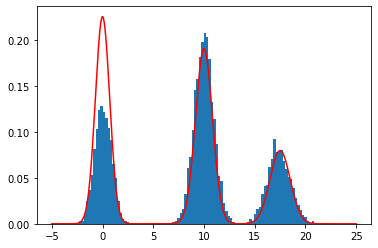

In [17]:
pdf_eta = lambda x: 0.4*(1/np.sqrt(2*math.pi*0.5))*np.exp((-1/2)*((x-0)**2/0.5)) + 0.2*(1/np.sqrt(2*math.pi*1))*np.exp((-1/2)*((x-17.5)**2/1))+0.4*(1/np.sqrt(2*math.pi*0.7))*np.exp((-1/2)*((x-10)**2/0.7))

plt.hist(X_list, density = True, bins = 100)
t = np.linspace(-5,25,1000)
vals = pdf_eta(t)
plt.plot(t,vals, 'r')

### all $ys$ past positions Auxiliary

In [33]:
# x_i move according to all ys
def simulate_list2(mu_list, sigma_list, n, alpha_list, p, y0_list, sigma, x0_list, epsilon, N):
    start = time.time()
    
    def f_pi(x):
        val = 0
        for i in range(len(mu_list)):
            val += alpha_list[i]*norm.pdf(x,mu_list[i], sigma_list[i]**0.5)
        return val

    def pdf_eta(x):
        return f_pi(x)**p

    c = integrate.quad(pdf_eta, -np.inf, np.inf)[0]
    
    def f_eta(x):
        return pdf_eta(x)/c
    
    def g(x):
        return(f_pi(x)/f_eta(x))
    
    '''
    def p_kernel_adjust(y0_list, sigma, n):
        Yn_list = y0_list
        estimator_matrix = np.empty((0,n), int)
        for i in range(len(Yn_list)):
            count = 0
            estimator_list = [y0_list[i]]
            Yn_list = y0_list
            while count<n:
                y = np.random.normal(Yn_list[i], sigma)
                u = np.random.uniform(0,1)
                alpha = (min((pdf_eta(y)/pdf_eta(Yn_list[i])),1))
                if u <= alpha:
                    estimator_list.append(y)
                    Yn_list[i] = y
                    count += 1
            estimator_matrix = np.append(estimator_matrix, [estimator_list[1:]], axis=0)
        return estimator_matrix

    def k_kernel_adjust(x0_list,sigma):
        Xn_list = x0_list
        estimator_matrix = np.empty((0,2), int)
        for i in range(len(Xn_list)):
            count = 0
            estimator_list = [x0_list[i]]
            Xn_list = x0_list
            while count<1:
                y = np.random.normal(Xn_list[i],sigma)
                u = np.random.uniform(0,1)
                alpha = min((pdf_eta(y)/pdf_eta(Xn_list[i])),1)
                if u <= alpha:
                    estimator_list.append(y)
                    Xn_list[i] = y
                    count +=1
            estimator_matrix = np.append(estimator_matrix, [estimator_list], axis=0)
        return estimator_matrix
    '''
    
    def p_kernel(y0, sigma, n):
        count = 0
        Yn = y0
        estimator = [y0]
        while count<n:
            y = np.random.normal(Yn, sigma)
            u = np.random.uniform(0,1)
            alpha = min((pdf_eta(y)/pdf_eta(Yn)),1)
            if u <= alpha:
                estimator.append(y)
                Yn = y
                count += 1
        return estimator
    
    def k_kernel(x0, sigma):
        count = 0
        Xn = x0
        estimator = [x0]
        while count<1:
            y = np.random.normal(Xn,sigma)
            u = np.random.uniform(0,1)
            alpha = min((pdf_eta(y)/pdf_eta(Xn)),1)
            if u <= alpha:
                estimator.append(y)
                Xn = y
                count += 1
        return estimator[-1]
    
    def sum_g(sum_old, yn):
        sum_new = sum_old + g(yn)
        return sum_new
    
    def prob_matrix_new(Y_matrix, sum_new):
        prob_matrix = np.zeros((len(Y_matrix),len(Y_matrix[0])))
        for i in range(len(Y_matrix[0])):
            for j in range(len(Y_matrix)):
                prob_matrix[j][i] = g(Y_matrix[j][i])/sum_new
        return prob_matrix
    
    def prob_matrix(Y_list, sum_old, prob_matrix_old):
        g_value = 0
        for i in (Y_list):
            g_value += g(i)
        sum_new = sum_old+g_value
        a = sum_old/sum_new
        prob_matrix = prob_matrix_old*a
        for i in range(len(Y_list)):
            Y_list [i] = g(Y_list[i])/sum_new
        prob_matrix = np.insert(prob_matrix,len(prob_matrix[0])-1,Y_list,axis=1)
        return prob_matrix
    
    def bernoulli_list(epsilon, n):
        b_list = bernoulli(epsilon).rvs(n)
        return b_list
    
    def x_sample(x0_list, epsilon, y0_list, n, sigma, N):
        X_matrix = np.empty(shape=(N,0),dtype='float')
        Y_matrix = np.empty(shape=(N,0),dtype='float')
        Y_matrix = np.insert(Y_matrix,0,y0_list,axis=1)
        X_matrix = np.insert(X_matrix,0,x0_list,axis=1)
        sum_Gs = 0
        Prob_matrix = np.empty(shape=(N,0),dtype='float')
        Prob_list = []
        
        for i in (y0_list):
            sum_Gs += g(i)
            
        for i in y0_list:
            Prob_list.append(g(i)/sum_Gs)
        Prob_matrix = np.insert(Prob_matrix, 0, Prob_list, axis=1)
        
        for i in range(n):
            sum_g = 0
            y_list = []
            x_list = []
            for j in range(N):
                y_list.append(p_kernel(Y_matrix[j][-1], sigma, 1)[-1])
                sum_g += g(y_list[j])
                
            Y_matrix = np.insert(Y_matrix, len(Y_matrix[0])-1, y_list, axis=1)
            Prob_matrix = prob_matrix(Y_matrix[:,i], sum_Gs, Prob_matrix)
            Y_matrix_flatten = Y_matrix.flatten()
            Prob_matrix_flatten = Prob_matrix.flatten()
            sum_Gs += sum_g
            
            for j in range(N):
                b = bernoulli(epsilon).rvs(1)
                if b == 0:
                    x_list.append(k_kernel(X_matrix[j][-1], sigma))
                if b == 1:
                    x_list.append(np.random.choice(Y_matrix_flatten, p = Prob_matrix_flatten))
            
            X_matrix = np.insert(X_matrix, len(X_matrix[0])-1, x_list, axis=1)
            
        return X_matrix
    
    def E_x(X_matrix):
        sum_matrix = X_matrix.sum()
        len_matrix = X_matrix.size
        average_matrix = sum_matrix/len_matrix
        return average_matrix
    
    X_matrix = x_sample(x0_list, epsilon, y0_list, n, sigma, N)
    mean = X_matrix.sum()/X_matrix.size
    
    print("total:"+str(time.time() - start))
    
    return mean, X_matrix.flatten()

In [35]:
mu_list = [0,17.5,10]
sigma_list = [.5,1,0.7]
alpha_list = [0.4,0.2,0.4]
p = 0.75
n = 100
y0_list = [15, 5, 2, 11, 2]
x0_list = [10,3,14,-2,13]
sigma = 10
epsilon = 0.05
N = 5

X_list11 = simulate_list2(mu_list, sigma_list, n, alpha_list, p, y0_list, sigma, x0_list, epsilon, N)[1]
X_list12 = simulate_list2(mu_list, sigma_list, n, alpha_list, p, y0_list, sigma, x0_list, epsilon, N)[1]
X_list13 = simulate_list2(mu_list, sigma_list, n, alpha_list, p, y0_list, sigma, x0_list, epsilon, N)[1]
X_list14 = simulate_list2(mu_list, sigma_list, n, alpha_list, p, y0_list, sigma, x0_list, epsilon, N)[1]
X_list15 = simulate_list2(mu_list, sigma_list, n, alpha_list, p, y0_list, sigma, x0_list, epsilon, N)[1]

# mean = simulate_list2(mu_list, sigma_list, n, alpha_list, p, y0_list, sigma, x0_list, epsilon, N)[0]
# print(mean)

total:6.675249099731445
total:6.830587863922119
total:5.115383148193359
total:5.123700141906738
total:4.762595891952515


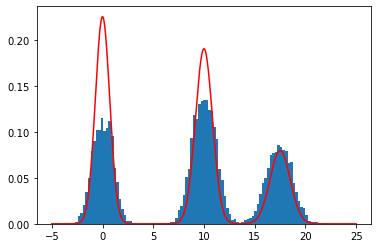

In [36]:
pdf_pi = lambda x: 0.4*(1/np.sqrt(2*math.pi*0.5))*np.exp((-1/2)*((x-0)**2/0.5)) + 0.2*(1/np.sqrt(2*math.pi*1))*np.exp((-1/2)*((x-17.5)**2/1))+0.4*(1/np.sqrt(2*math.pi*0.7))*np.exp((-1/2)*((x-10)**2/0.7))

plt.hist(X_list, density = True, bins = 100)
t = np.linspace(-5,25,1000)
vals = pdf_pi(t)
plt.plot(t,vals, 'r')